<a href="https://colab.research.google.com/github/frh02/CAN_Research/blob/main/DoS_Attack_LSTM_CAN_Binary_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM Model for Binary Classification

## import libraries 

In [1]:
import pandas as pd
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import keras.utils
from keras import utils as np_utils
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md
import pandas as pd
import csv
%matplotlib inline  
from ast import literal_eval 
import array as array

## load the data

In [2]:
df1 = pd.read_fwf('/content/Attack_free_dataset_small.txt')
df1["Target"] = 0
df1.rename(columns={'Id': 'ID'})
print(df1)
df1.to_csv('Attack_free.csv')

             Time   seconds   ID Value  App  ...   D5   D6   D7   D8 Target
0      Timestamp:  0.000000  ID:  0316    0  ...   20   1a   00   7f      0
1      Timestamp:  0.000224  ID:  0329    0  ...   11   2f   00   10      0
2      Timestamp:  0.000462  ID:  0080    0  ...   20   1a   20   43      0
3      Timestamp:  0.000704  ID:  0081    0  ...   00   00   00   53      0
4      Timestamp:  0.000878  ID:  0120    0  ...  NaN  NaN  NaN  NaN      0
...           ...       ...  ...   ...  ...  ...  ...  ...  ...  ...    ...
39996  Timestamp:  7.513203  ID:  0545    0  ...   37   00   37   00      0
39997  Timestamp:  7.515349  ID:  05a2  100  ...  NaN  NaN  NaN  NaN      0
39998  Timestamp:  7.515502  ID:  05a2    0  ...  NaN  NaN  NaN  NaN      0
39999  Timestamp:  7.515800  ID:  02b0    0  ...   77  NaN  NaN  NaN      0
40000  Timestamp:  7.516036  ID:  0165    0  ...   00   00   07   80      0

[40001 rows x 16 columns]


In [3]:
df2 = pd.read_fwf('/content/DoS_attack_small.txt')
df2["Target"] = 1
df2.rename(columns={'Id': 'ID'})
print(df2)
df2.to_csv('DoS_Attack.csv')

             Time   seconds   ID Value  App   DLC  ...  D4  D5  D6  D7  D8 Target
0      Timestamp:  0.000000  ID:  0000    0  DLC:  ...  00  00  00  00  00      1
1      Timestamp:  0.000271  ID:  0080    0  DLC:  ...  09  16  11  16  bb      1
2      Timestamp:  0.000495  ID:  0000    0  DLC:  ...  00  00  00  00  00      1
3      Timestamp:  0.000736  ID:  0081    0  DLC:  ...  00  00  00  00  6b      1
4      Timestamp:  0.000983  ID:  0000    0  DLC:  ...  00  00  00  00  00      1
...           ...       ...  ...   ...  ...   ...  ...  ..  ..  ..  ..  ..    ...
39995  Timestamp:  2.591379  ID:  0165    0  DLC:  ...  00  00  00  03  89      1
39996  Timestamp:  2.591614  ID:  0000    0  DLC:  ...  00  00  00  00  00      1
39997  Timestamp:  2.591861  ID:  018f    0  DLC:  ...  00  00  3f  00  00      1
39998  Timestamp:  2.592106  ID:  0000    0  DLC:  ...  00  00  00  00  00      1
39999  Timestamp:  2.592365  ID:  0153    0  DLC:  ...  ff  00  ff  20  ae      1

[40000 rows x 1

In [4]:
df1_n = pd.read_csv('/content/DoS_Attack.csv')
df2_n = pd.read_csv('/content/Attack_free.csv')
frames= [df1_n,df2_n]
df = pd.concat(frames)
df = df.fillna(0)
df.to_csv('input_train.csv')
print(df)

       Unnamed: 0        Time   seconds   ID Value  ...  D5  D6  D7  D8 Target
0               0  Timestamp:  0.000000  ID:  0000  ...  00  00  00  00      1
1               1  Timestamp:  0.000271  ID:  0080  ...  16  11  16  bb      1
2               2  Timestamp:  0.000495  ID:  0000  ...  00  00  00  00      1
3               3  Timestamp:  0.000736  ID:  0081  ...  00  00  00  6b      1
4               4  Timestamp:  0.000983  ID:  0000  ...  00  00  00  00      1
...           ...         ...       ...  ...   ...  ...  ..  ..  ..  ..    ...
39996       39996  Timestamp:  7.513203  ID:  0545  ...  37  00  37  00      0
39997       39997  Timestamp:  7.515349  ID:  05a2  ...   0   0   0   0      0
39998       39998  Timestamp:  7.515502  ID:  05a2  ...   0   0   0   0      0
39999       39999  Timestamp:  7.515800  ID:  02b0  ...  77   0   0   0      0
40000       40000  Timestamp:  7.516036  ID:  0165  ...  00  00  07  80      0

[80001 rows x 17 columns]


## cleaning the data 

In [5]:
properties = list(df.columns.values)
properties.remove('Time')
properties.remove('seconds')
properties.remove('ID')
properties.remove('DLC')
properties.remove('App')
properties.remove('Unnamed: 0')
properties.remove('Target')
df['Value']=df['Value'].apply(lambda x: int(str(x),16))
df['D1']=df['D1'].apply(lambda x: int(str(x),16))
df['D2']=df['D2'].apply(lambda x: int(str(x),16))
df['D3']=df['D3'].apply(lambda x: int(str(x),16))
df['D4']=df['D4'].apply(lambda x: int(str(x),16))
df['D5']=df['D5'].apply(lambda x: int(str(x),16))
df['D6']=df['D6'].apply(lambda x: int(str(x),16))
df['D7']=df['D7'].apply(lambda x: int(str(x),16))
df['D8']=df['D8'].apply(lambda x: int(str(x),16))
X = df[properties]
y = df['Target']
print(y.shape)
print(df)
X = np.expand_dims(X, axis=2)
y = np.expand_dims(y, axis=1)
print(X.shape)
print(y.shape)


(80001,)
       Unnamed: 0        Time   seconds   ID  Value  ...   D5  D6  D7   D8  Target
0               0  Timestamp:  0.000000  ID:      0  ...    0   0   0    0       1
1               1  Timestamp:  0.000271  ID:    128  ...   22  17  22  187       1
2               2  Timestamp:  0.000495  ID:      0  ...    0   0   0    0       1
3               3  Timestamp:  0.000736  ID:    129  ...    0   0   0  107       1
4               4  Timestamp:  0.000983  ID:      0  ...    0   0   0    0       1
...           ...         ...       ...  ...    ...  ...  ...  ..  ..  ...     ...
39996       39996  Timestamp:  7.513203  ID:   1349  ...   55   0  55    0       0
39997       39997  Timestamp:  7.515349  ID:   1442  ...    0   0   0    0       0
39998       39998  Timestamp:  7.515502  ID:   1442  ...    0   0   0    0       0
39999       39999  Timestamp:  7.515800  ID:    688  ...  119   0   0    0       0
40000       40000  Timestamp:  7.516036  ID:    357  ...    0   0   7  128    

## 2D To 3D array conversion

In [6]:
TIME_STEPS = 288
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps):
        output.append(values[i : (i + time_steps)])
    # Convert 2D sequences into 3D as we will be feeding this into
    # a convolutional layer.
    return np.expand_dims(output, axis=2)

training_value = df 
x_train = create_sequences(training_value)
print("Training input shape: ", x_train.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Training input shape:  (79713, 288, 1, 17)


## creating the LSTM model 

In [11]:
n_steps = X_train.shape[1]
n_features = X_train.shape[2]

keras.backend.clear_session()
model = keras.Sequential(
    [
        layers.Input(shape=(n_steps, n_features)),
        layers.Conv1D(filters=32, kernel_size=15, padding='same', data_format='channels_last',
            dilation_rate=1, activation="linear"),
        layers.LSTM(
            units=512, activation="tanh", name="lstm_1", return_sequences=False
        ),
        layers.RepeatVector(n_steps),
        layers.LSTM(
            units=128, activation="tanh", name="lstm_2", return_sequences=True
        ),
        
        layers.LSTM(
            units=64, activation="tanh", name="lstm_3", return_sequences=True
        ),
        layers.LSTM(
            units=128, activation="tanh", name="lstm_4", return_sequences=True
        ),
        layers.Conv1D(filters=32, kernel_size=15, padding='same', data_format='channels_last',
            dilation_rate=1, activation="linear"),

        layers.TimeDistributed(layers.Dense(1, activation='linear'))
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 10, 32)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 512)               1116160   
_________________________________________________________________
repeat_vector (RepeatVector) (None, 10, 512)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 128)           328192    
_________________________________________________________________
lstm_3 (LSTM)                (None, 10, 64)            49408     
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 128)           98816     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 32)            6

In [16]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=256,
    validation_split=0.1,
    #callbacks=[
    #    keras.callbacks.EarlyStopping(monitor="val_loss", patience=25, mode="min", restore_best_weights=True)
    #],
)

Epoch 1/100
197/197 [==============================] - 3s 15ms/step - loss: 0.2131 - accuracy: 0.8967 - val_loss: 0.2122 - val_accuracy: 0.9000
Epoch 2/100
197/197 [==============================] - 3s 14ms/step - loss: 0.2997 - accuracy: 0.8852 - val_loss: 0.2129 - val_accuracy: 0.8987
Epoch 3/100
197/197 [==============================] - 3s 15ms/step - loss: 0.2133 - accuracy: 0.8965 - val_loss: 0.2188 - val_accuracy: 0.8988
Epoch 4/100
197/197 [==============================] - 3s 15ms/step - loss: 0.2393 - accuracy: 0.8883 - val_loss: 0.2245 - val_accuracy: 0.8903
Epoch 5/100
197/197 [==============================] - 3s 14ms/step - loss: 0.7434 - accuracy: 0.8539 - val_loss: 5.1729 - val_accuracy: 0.5254
Epoch 6/100
197/197 [==============================] - 3s 14ms/step - loss: 4.4651 - accuracy: 0.6948 - val_loss: 4.1804 - val_accuracy: 0.7277
Epoch 7/100
197/197 [==============================] - 3s 15ms/step - loss: 3.9600 - accuracy: 0.7385 - val_loss: 3.9711 - val_accuracy:

KeyboardInterrupt: ignored

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

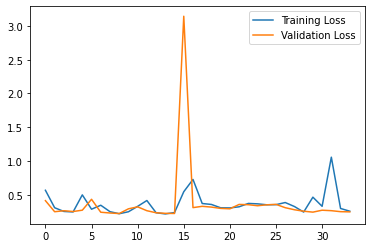

In [18]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

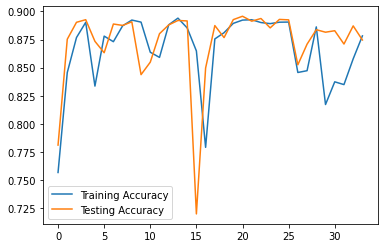

In [19]:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Testing Accuracy")
plt.legend()
plt.show()

## Using DNN model for same data 

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(10,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
	  #keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    #keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [23]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              
              loss='binary_crossentropy',
              metrics=['accuracy'],
              )

history = model.fit(X_train, y_train, epochs=70, batch_size=128, validation_split=0.2)
test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/70
350/350 [==============================] - 1s 3ms/step - loss: 1.5577 - accuracy: 0.7376 - val_loss: 0.3122 - val_accuracy: 0.8661
Epoch 2/70
350/350 [==============================] - 1s 3ms/step - loss: 0.3244 - accuracy: 0.8417 - val_loss: 0.2690 - val_accuracy: 0.8674
Epoch 3/70
350/350 [==============================] - 1s 3ms/step - loss: 0.2842 - accuracy: 0.8640 - val_loss: 0.2443 - val_accuracy: 0.8831
Epoch 4/70
350/350 [==============================] - 1s 3ms/step - loss: 0.2481 - accuracy: 0.8764 - val_loss: 0.2429 - val_accuracy: 0.8454
Epoch 5/70
350/350 [==============================] - 1s 3ms/step - loss: 0.2321 - accuracy: 0.8822 - val_loss: 0.2161 - val_accuracy: 0.8838
Epoch 6/70
350/350 [==============================] - 1s 3ms/step - loss: 0.2223 - accuracy: 0.8888 - val_loss: 0.2103 - val_accuracy: 0.8988
Epoch 7/70
350/350 [==============================] - 1s 3ms/step - loss: 0.2296 - accuracy: 0.8859 - val_loss: 0.2225 - val_accuracy: 0.8973
Epoch 

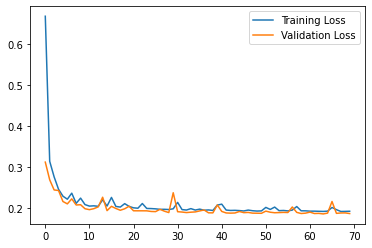

In [24]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

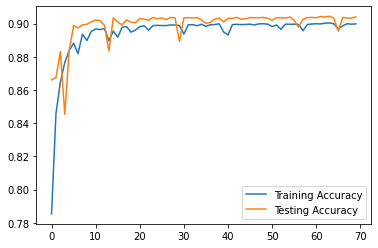

In [25]:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Testing Accuracy")
plt.legend()
plt.show()